<a href="https://colab.research.google.com/github/alexis12895/TFG_practica/blob/main/Redes_neuronales_conceptos/Keras0_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importamos algunos maodulos de Keras
from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD #Usamos esta linea con TensorFlow, ya que si no, no me dejara importarla


    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


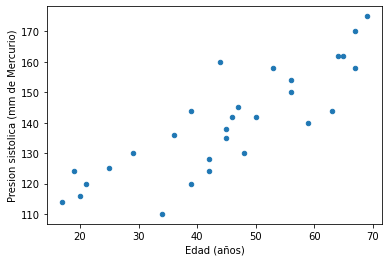

In [ ]:
#Lectura de datos con pandas
datos = pd.read_csv('https://raw.githubusercontent.com/codificandobits/Regresion_Lineal_En_Python/7510626885ead4dd88ea242a7f9e6357868dbb0e/dataset.csv', sep=",", skiprows=32, usecols=[2,3])
print(datos)

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

#Graficamos los datos para ver como es la tendencia de estos
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presion sistolica (mm de Mercurio)')
plt.show()


In [ ]:
#Implementamos el modelo en Keras
#Sequential:  este modulo nos permite crear como una caja vacia a la que luego podemos añadirle elementos para definir nuestro modelo

#Asi creamos el contenedor
np.random.seed(2) #Nos permite replicar el entrenamiento en otro ordenador, garantiza que los parametros se inicializan de forma aleatoria pero con los mismos valores.
modelo = Sequential()

#Añadimos los elementos a nuestro modelo
output_dim = 1 #Especifica el tam de salida, aqui sera el valor de la presion sanguinea, por lo que sera 1(por que es un dato numerico y no un vector, matriz o imagen)
input_dim = 1 #Se refiera al tam de los datos de entrada, es esta caso la edad, y la dimension igual es 1, por ser un dato numerico
modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear')) #Añadimos con add las capas al modelo, Dense(capa) nos dice que solo hemos añadido una capa al modelo -> activation(linear) nos dice que el modelo tendra un comportamiento lineal

#Metodo que se usara para el entranamiento del modelo(Gradiente descendente) con SGD
#SGD(Stochastic Gradient Descent), por eso usamos este modulo, ya qu enos permite indicar que el metodo de entrenamiento sera el Graidente Descendente

#Creamos una instacia de SGD, con una tasa de aprendizaje
sgd = SGD(lr=0.0004)
modelo.compile(loss='mse', optimizer=sgd) #Enlazamos el objeto anterior con  el modelo, indicandole que usarremos el error medio cuadratico(mse) y que el modelo hara uso del Gradiente descendente(sgd)

#Metodo para impirmir un resumen de las caracteristicas de nuestro modelo
modelo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Entrenamiento: realizmaos la regresion lineal

# 40000 iteraciones y todos los datos de entrenamiento (29) se usarán en cada iteración (batch_size = 29)
num_epochs = 40000  #el numero de iteracion que usara el entrenamiento para conseguir el minimo error
batch_size = x.shape[0] #la cantidad de datos que usaremos en cada iteracion, es este caso decimos que seran 29, es decir todos, por que tenemos poquitos datos
historia = modelo.fit(x, y, epochs=num_epochs, batch_size= batch_size, verbose=0) #verbose nos indica si quieremos imprimir en pantalla los reusltados del entrenamiento en cada iteracion, con 0, decimos que NO // historia, guarda los resultados del entrenamiento // fit: metodo para realizar el entranamiento


#Resultado: los parametros w y b calculados en el entrenamiento podemos imprimirlos
capas = modelo.layers[0]  #Obtenemos la capa del modelo, la lineal
w, b = capas.get_weights() #obtenemos los pesos de esa capa, que sera w y  b
print('Parametros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))



Parametros: w = 1.0, b = 93.5


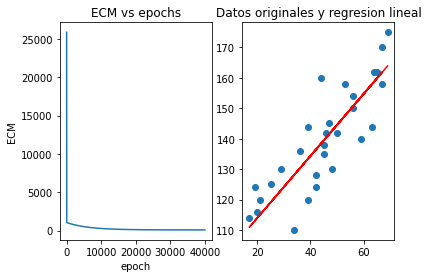

In [ ]:
#Graficamos los resultados de ECM(error medio cuadratico) vs epochs y e resultado de la regresion lineal(el grafico con la raya roja)
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs epochs')

y_regr = modelo.predict(x) #linea roja
plt.subplot(1,2,2)
plt.scatter(x, y)
plt.plot(x, y_regr, 'r')
plt.title('Datos originales y regresion lineal')
plt.show()

In [ ]:
#Prediccion: esta prediccion la hacemos una vez este entrenado el modelo y con datos diferentes a los que hemos usado en el entrenamiento

x_pred = np.array([90]) #añadimos la edad como un vector de NUmpy
y_pred = modelo.predict(x_pred) #metodo para realizar predicciones
print("La presion sanguinea sera de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0])) # el punto estara por arriba de la tabla


La presion sanguinea sera de 185.3 mm-Hg  para una persona de 90 años
